In [2]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import networkx as nx
import matplotlib.cm as cm
import numpy as np

ox.config(log_file=True, log_console=True, use_cache=True)

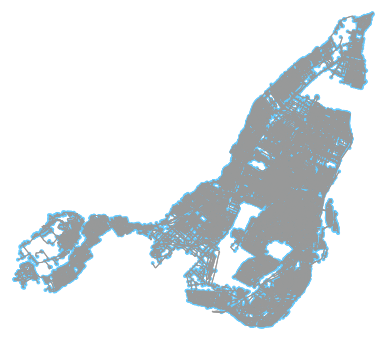

In [3]:
G = ox.graph_from_place('Montreal, Canada', network_type='walk')
fig, ax = ox.plot_graph(G)

In [ ]:
stats = ox.basic_stats(ox.graph_from_place('Montreal, Canada'))
stats['circuity_avg']

In [ ]:
place = 'Montreal, Canada'
gdf = ox.gdf_from_place(place)
area = ox.project_gdf(gdf).unary_union.area
G = ox.graph_from_place(place, network_type='walk')

In [ ]:
stats = ox.basic_stats(G, area=area)
extended_stats = ox.extended_stats(G, ecc=True, bc=True, cc=True)
for key, value in extended_stats.items():
    stats[key] = value
pd.Series(stats)

In [ ]:
stats = ox.basic_stats(G, area=area)
for k, count in stats['streets_per_node_counts'].items():
    stats['int_{}_count'.format(k)] = count
for k, proportion in stats['streets_per_node_proportion'].items():
    stats['int_{}_prop'.format(k)] = proportion

del stats['streets_per_node_counts']
del stats['streets_per_node_proportion']

# load as a pandas frame
pd.DataFrame(pd.Series(stats)).T

In [ ]:
G_projected = ox.project_graph(G)
max_node, max_bc = max(extended_stats['betweenness_centrality'].items(), key=lambda x: x[1])
max_node, max_bc

In [ ]:
nc = ['r' if node==max_node else '#336699' for node in G_projected.nodes()]
ns = [50 if node==max_node else 8 for node in G_projected.nodes()]
fig, ax = ox.plot_graph(G_projected, node_size=ns, node_color=nc, node_zorder=2)

In [ ]:
# get a color for each node
def get_color_list(n, color_map='plasma', start=0, end=1):
    return [cm.get_cmap(color_map)(x) for x in np.linspace(start, end, n)]

def get_node_colors_by_stat(G, data, start=0, end=1):
    df = pd.DataFrame(data=pd.Series(data).sort_values(), columns=['value'])
    df['colors'] = get_color_list(len(df), start=start, end=end)
    df = df.reindex(G.nodes())
    return df['colors'].tolist()

nc = get_node_colors_by_stat(G_projected, data=extended_stats['betweenness_centrality'])
fig, ax = ox.plot_graph(G_projected, node_color=nc, node_edgecolor='gray', node_size=20, node_zorder=2)


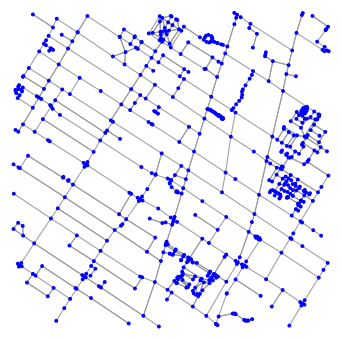

In [8]:
location_point = (45.512502, -73.570142)
G = ox.graph_from_point(location_point, distance=500, simplify=False)
fig, ax = ox.plot_graph(G, node_color='b', node_zorder=3)

In [10]:
G2 = G.copy()
G2 = ox.simplify_graph(G2)

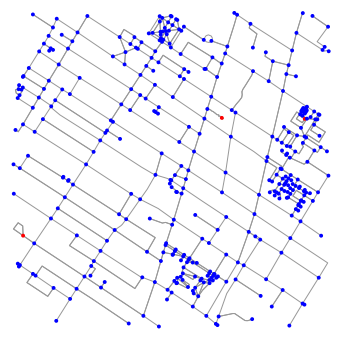

In [11]:
loops = [edge[0] for edge in G2.selfloop_edges()]
nc = ['r' if node in loops else 'b' for node in G2.nodes()]
fig, ax = ox.plot_graph(G2, node_color=nc, node_zorder=3)

In [ ]:
ec = ox.get_edge_colors_by_attr(G2, attr='length')
fig, ax = ox.plot_graph(G2, node_color='w', node_edgecolor='b', node_size=20, node_zorder=3, edge_color=ec, edge_linewidth=2.5)

Now we can define our lat/long points, create a network, and select some origin/destination points

In [ ]:
##This will only use the centermost node to some other node. Could be interesting for certain applications
location_point = (45.512502, -73.570142)
G = ox.graph_from_point(location_point, distance=500, distance_type='network', network_type='walk')
origin_node = ox.get_nearest_node(G, location_point)
destination_node = list(G.nodes())[-1]

This will plot the shortest route between the 2 points

In [ ]:
route = nx.shortest_path(G, origin_node, destination_node)
fig, ax = ox.plot_graph_route(G, route)

# Plot path from one lat/long point to another

First, we define the origin/destination points and get the nodes nearest to them.

In [ ]:
origin_point = (45.504559,-73.581999)
destination_point = (45.509861,-73.563835)
origin_node = ox.get_nearest_node(G, origin_point)
destination_node = ox.get_nearest_node(G, destination_point)
origin_node, destination_node

This finds the shortest path, and prints a string of the points in transit.

In [ ]:
route = nx.shortest_path(G, origin_node, destination_node, weight='length')
str(route)

This will plot the path

In [ ]:
fig, ax = ox.plot_graph_route(G, route, origin_point=origin_point, destination_point=destination_point)